In [57]:
import pandas as pd

In [58]:
labels = {"No One": "None",
          "Distillation (distilbert)": "Know. Distil.",
          "Pruning 0.2": "Pruning (0.2)",
            "Pruning 0.4": "Pruning (0.4)",
            "Pruning 0.6": "Pruning (0.6)",
            'Quantization  (quanto-qfloat8)': "Quantization (float8)",
            'Quantization (quanto-qfloat8)': "Quantization (float8)",
            'Quantization  (quanto-qint8)': "Quantization (int8)",
            'Quantization (quanto-qint8)': "Quantization (int8)",
            'Quantization  (quanto-qint4)': "Quantization (int4)",
            'Quantization (quanto-qint4)': "Quantization (int4)" }

df = pd.read_csv('experiment_values.csv', delimiter=';')

df["Compression Method"] = df["Compression Method"].map(labels)

methods_order = ["None"] + sorted([cm for cm in df["Compression Method"].unique() if cm != "None"])

# Defect Prediction

In [72]:
df_ = df[df['Task'] == 'Defect Prediction']

df_ = df_.pivot(index='Compression Method', columns='Parameter', values='Value')
df_ = df_.reindex(methods_order)



df_["Method"] = df_.index.map(lambda x: "Pruning" if x.startswith("Pruning") else ("Quantization" if x.startswith("Quantization")  else x))

## Prediction Performance

In [73]:
table = df_[["Accuracy", "MCC"]].copy(deep=True)  
#replace the highest values of each column with \textbf{value}


for metric in table.columns:
    # calculate the percentage change
    perc = ((table[metric] / table.loc["None", metric] * 100) - 100).map(lambda x: f"{x:+.1f}\%")
    # find the top 2 values
    top_2 = table.loc[methods_order[1:], metric].sort_values(ascending=False)[:2]
    # format the values
    table.loc[:, metric] = table[metric].map(lambda x: f"{x:.2f}")
    # the highest value is bold
    table.loc[top_2.index[0], metric] = "\\textbf{" + table.loc[top_2.index[0], metric] + "}"
    # the second highest value is underlined
    table.loc[top_2.index[1], metric] = "\\underline{" + table.loc[top_2.index[1], metric] + "}"
    # add the percentage change
    table.loc[methods_order[1:], metric] = table.loc[methods_order, metric] + " (" + perc + ")"

    
table.reset_index(inplace=True)

table.rename(columns={c:"\\textbf{" + c + "}"  for c in table.columns}, inplace=True)

table.to_latex("tables/defect_prediction_acc.tex", escape=False, index=False)



<>:7: SyntaxWarning: invalid escape sequence '\%'
<>:7: SyntaxWarning: invalid escape sequence '\%'
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/2674119036.py:7: SyntaxWarning: invalid escape sequence '\%'
  perc = ((table[metric] / table.loc["None", metric] * 100) - 100).map(lambda x: f"{x:+.1f}\%")
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/2674119036.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.63' '0.62' '0.60' '0.58' '0.59' '0.63' '0.62' '0.63']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.loc[:, metric] = table[metric].map(lambda x: f"{x:.2f}")
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/2674119036.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.25' '0.22' '0.22' '0.20' '0.20' '0.25' '0.23' '0.24']' has dty

In [76]:
table = df_[["Avg Inference Time CPU", "Avg Inference Time CUDA", "Model Size"]].copy(deep=True)

## Efficiency Metrics

In [77]:
for metric in  table.columns:
    perc = ((table[metric] / table.loc["None", metric] * 100) - 100).map(lambda x: f"{x:+.1f}\%")
    top_2 = table.loc[methods_order[1:], metric].sort_values(ascending=True)[:2]

    if metric == "Model Size":
        table.loc[:, metric] = table[metric].map(lambda x: f"{x:.0f}")
    elif metric == "Avg Inference Time CUDA":
        table.loc[:, metric] = table[metric].map(lambda x: f"{x:.3f}")
    else:
        table.loc[:, metric] = table[metric].map(lambda x: f"{x:.1f}")


    table.loc[top_2.index[0], metric] = "\\textbf{" + table.loc[top_2.index[0], metric] + "}"
    table.loc[top_2.index[1], metric] = "\\underline{" + table.loc[top_2.index[1], metric] + "}"
    
    table.loc[methods_order[1:], metric] = table.loc[methods_order, metric] + " (" + perc + ")"

    
table.reset_index(inplace=True)

table.rename(columns={c:"\\textbf{" + c + "}"  for c in table.columns}, inplace=True)

table.to_latex("tables/defect_prediction_time_size.tex", escape=False, index=False)

<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/3117267656.py:2: SyntaxWarning: invalid escape sequence '\%'
  perc = ((table[metric] / table.loc["None", metric] * 100) - 100).map(lambda x: f"{x:+.1f}\%")
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/3117267656.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['15.4' '9.1' '18.5' '18.8' '5.8' '25.3' '36.0' '31.5']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.loc[:, metric] = table[metric].map(lambda x: f"{x:.1f}")
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/3117267656.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.010' '0.005' '0.014' '0.011' '0.011' '0.021' '0.030' '0.019']' ha

In [11]:
# map to acronym
acronyms = {"None": "N",
            "Pruning (0.2)": "P.2",
            "Pruning (0.4)": "P.4",
            "Pruning (0.6)": "P.6",
            "Quantization (float8)": "QF8",
            "Quantization (int8)": "QI8",
            "Quantization (int4)": "QI4",
            "Know. Distil.": "KD"
            }

In [25]:
xlabels = { "Avg Inference Time CPU": "Inference Time (CPU) [sec.]",
            "Avg Inference Time CUDA": "Inference Time (CUDA) [sec.]",
            "Model Size": "Model Size [MB]"
            }

/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/779875451.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticklabels()])
/var/folders/_0/ks7ndv3d5d566w3jv_ql2ml00000gn/T/ipykernel_2262/779875451.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['' for i in ax.get_yticklabels()])


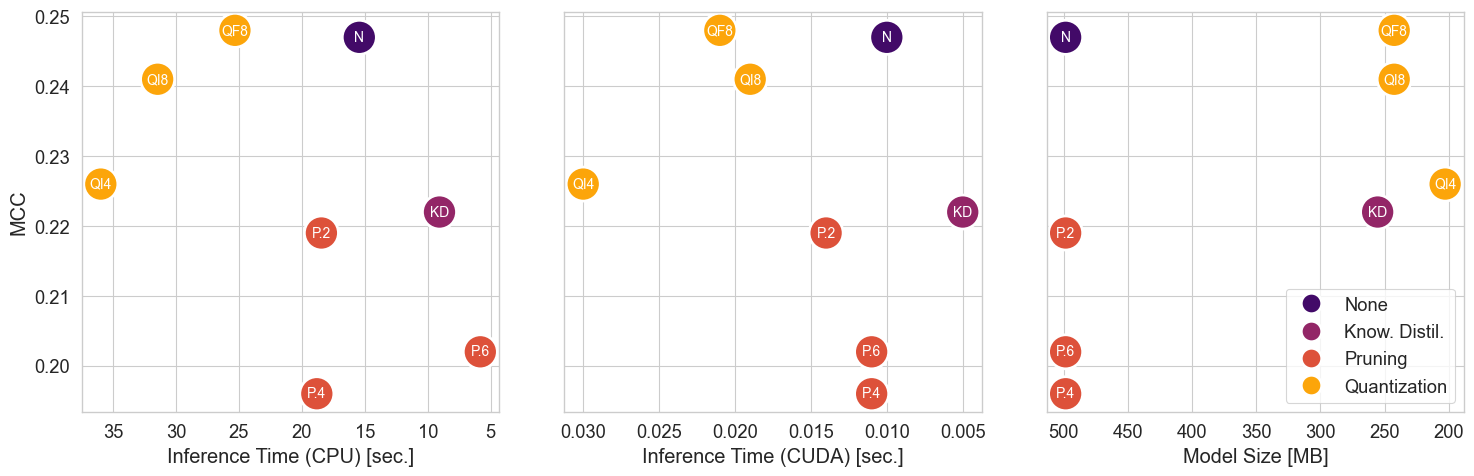

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


df_.reset_index(inplace=True)


# set font size of the labels and ticks
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for metric, ax in zip(["Avg Inference Time CPU", "Avg Inference Time CUDA", "Model Size"], axs):
    if metric != "Avg Inference Time CPU":
        # hide y label and ticks labels
        ax.set_yticklabels(['' for i in ax.get_yticklabels()])
        ax.set_ylabel(" ")
    
    sns.scatterplot(data=df_, x=metric, y="MCC", hue="Method", ax=ax, legend=(metric == "Model Size"), s=600, palette="inferno")

    # remove the legend title if it exists
    # reduce size of the legend symbols

    if metric == "Model Size":
        ax.legend(title=None, markerscale=0.6)

    
    # reverse the x-axis
    ax.invert_xaxis()
    ax.set_xlabel(xlabels[metric])

    # add the acronyms to the plot
    for i, row in df_.iterrows():
        # center on the point and white font
        ax.text(row[metric], row["MCC"], acronyms[row["Compression Method"]], fontsize=10, ha='center', va='center', color='white')


plt.tight_layout()
plt.savefig("figures/defect_prediction_tradeoff.pdf")